In [5]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
#import gdown
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#download from gdrive
!gdown "https://drive.google.com/uc?id=1fakbbdmqXLY8cyQdbd2kbHDQaN_XzCQb"

/bin/bash: gdown: command not found


In [6]:
#load into pandas
df=pd.read_csv("wine-reviews.csv")

In [7]:
#drop all null values in the description and points section:
df = df.dropna(subset=["description", "points"])

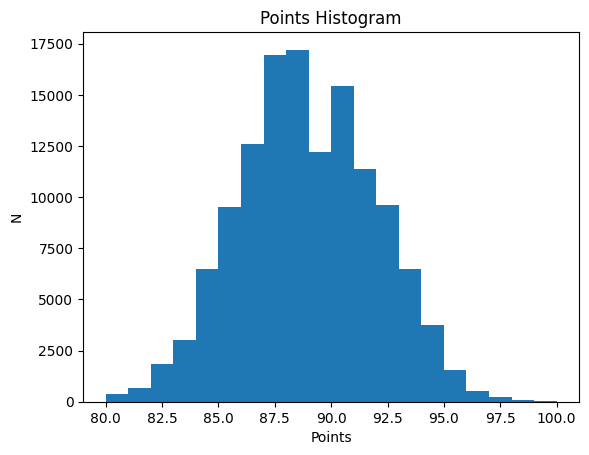

In [8]:
#plot a histogram to visualise the data
plt.hist(df.points, bins=20)
plt.title("Points Histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

# a note on loss functions

L1 loss= sum(y_real - y_pred)
L2 loss=sum((y_real - y_pred)^2)
Binary cross entropy  loss = -1/N*sum(y_real *log(y_pred)+(1-y_real)*log((1-y_pred)))

loss decreases as accuracy gets better
without activation functions neural networks just become a linear model. Not what we want otherwise we would use a linear model

# backpropagation /gradient descent

w_(0, new)= w_(0, old) - a*(slope of loss function at w_old)

a is the learning rate or "the steps" we are taking in the direction of the los function's minimum.  (this slope is the derivative). The smaller the derivative the less rapidly the loss function is decreasing/increasing .

This way based on this backpropagation we know if we need to increase the weight or decrease the weight based off of the loss function

# feed forward nn example

In [9]:

!gdown "https://drive.google.com/uc?id=1thSxj95Tfgz6I1KOFsmXz4OHv8FcLHk4"

/bin/bash: gdown: command not found


In [10]:
db_df = pd.read_csv("diabetes.csv")
#we shall try to predict the outcome
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


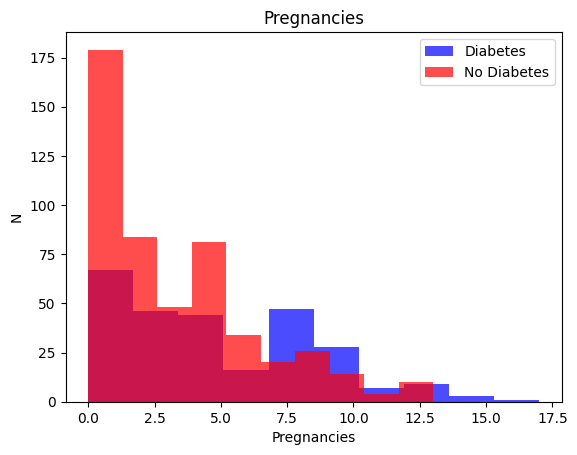

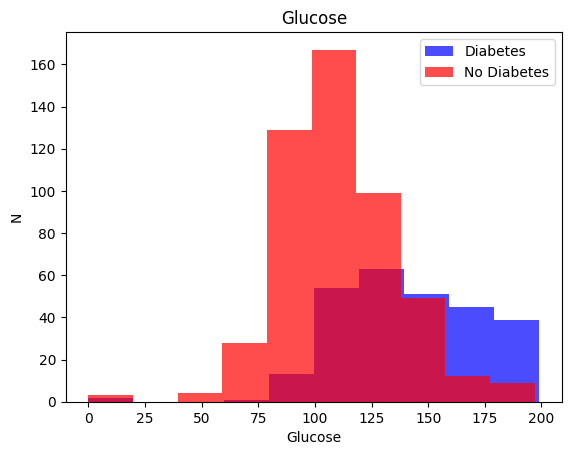

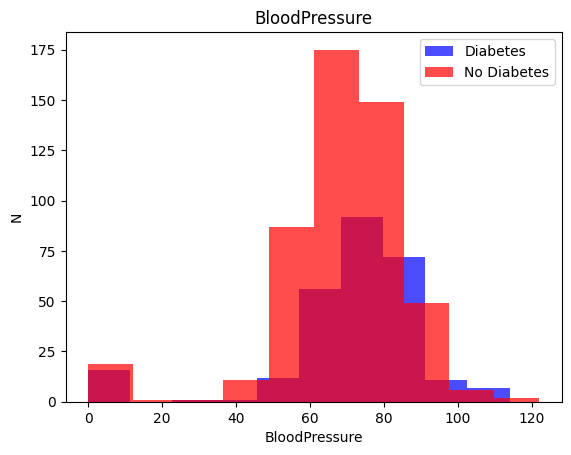

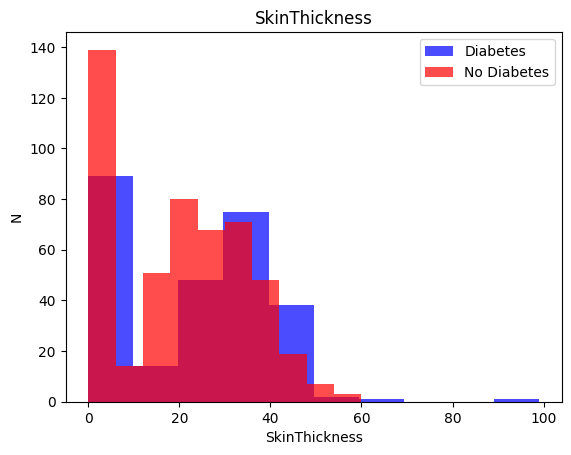

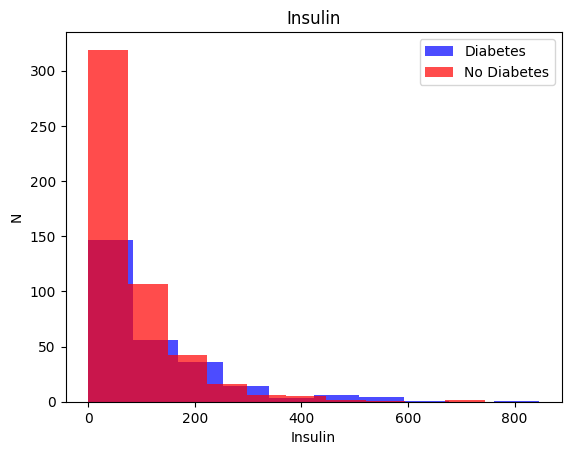

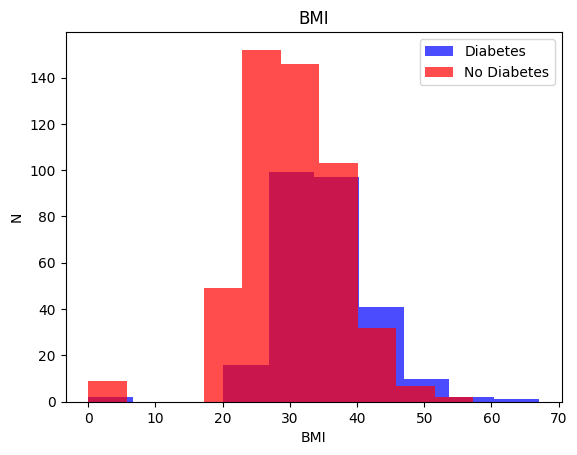

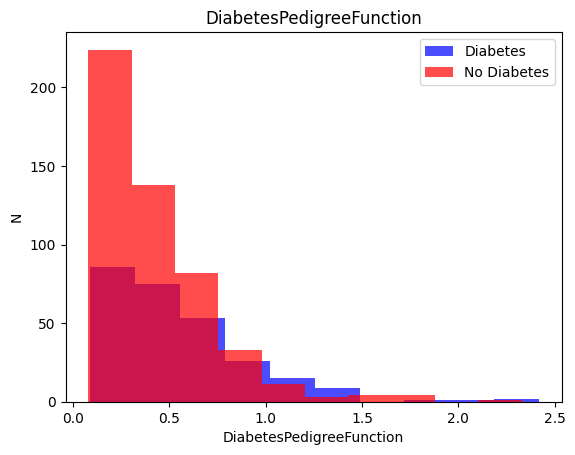

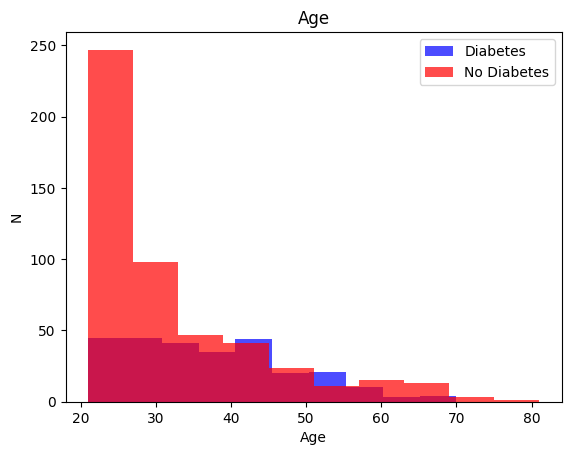

In [11]:
for i in range(len(db_df.columns[:-1])):
    label = db_df.columns[i]
    plt.hist(db_df[db_df["Outcome"]==1][label], color="blue", label="Diabetes", alpha=0.7)
    plt.hist(db_df[db_df["Outcome"]==0][label], color="red", label="No Diabetes", alpha=0.7)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [12]:
#features that we will feed into the model:
X = db_df[db_df.columns[:-1]].values
y = db_df[db_df.columns[-1]].values #target that we are trying to predict

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#reshape the data:
data = np.hstack((X, np.reshape(y,(-1, 1)))) #right now our x is a 2d matrix but the y is a 1d matrix(a vector)
#this hstack projects it. -1 means numpy gets to decide, the other 1 means that it will be an object of 2nd dimension but just with 1 column
transform_df = pd.DataFrame(data, columns= db_df.columns)

In [14]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)

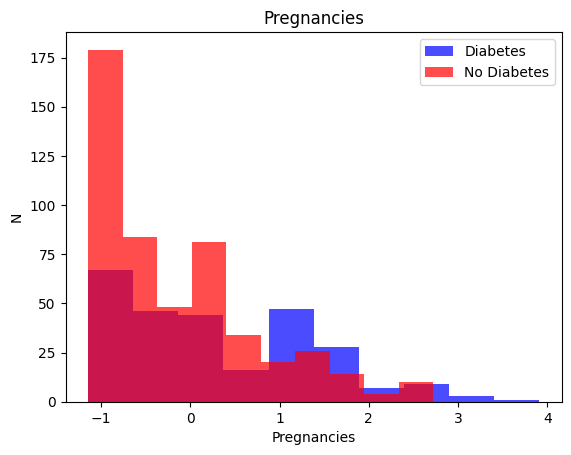

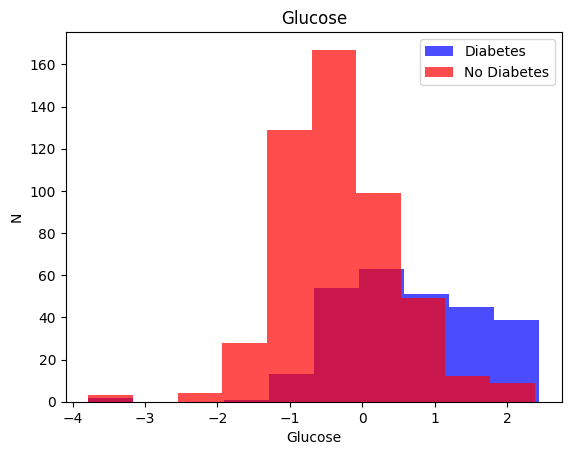

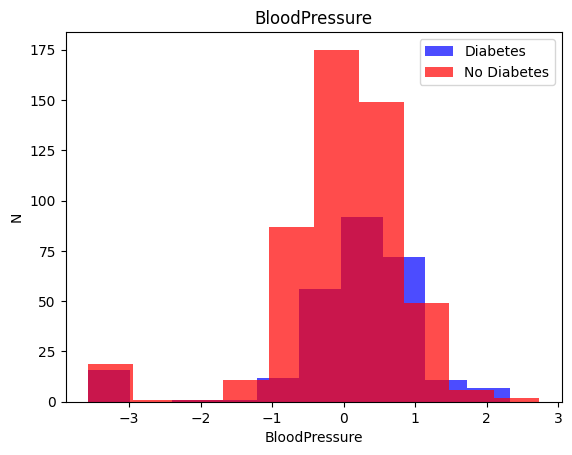

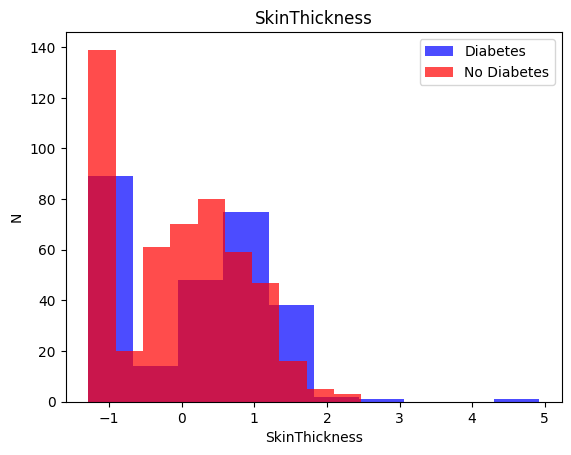

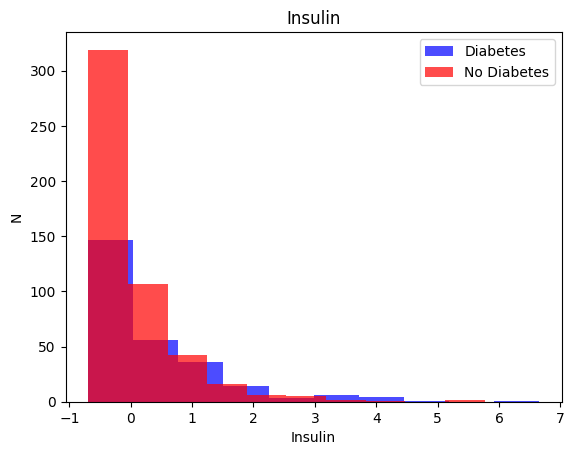

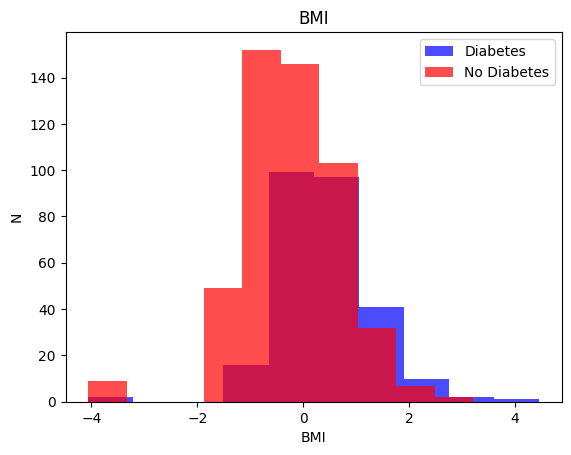

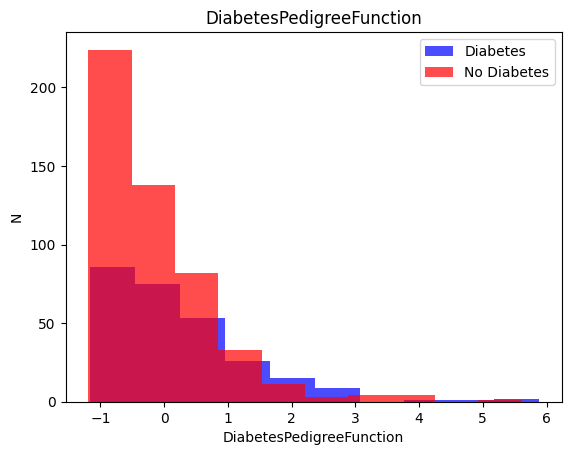

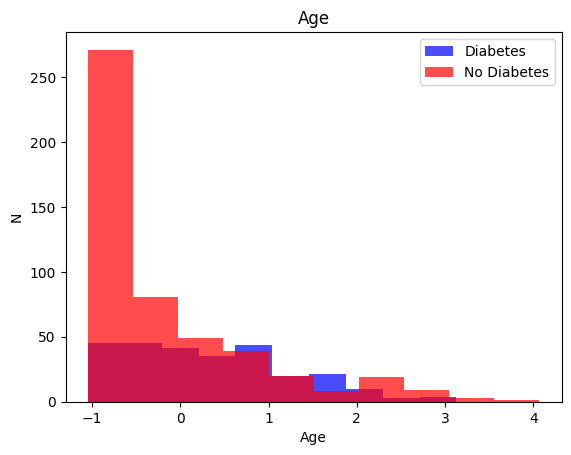

In [15]:
for i in range(len(transform_df.columns[:-1])):
    label = db_df.columns[i]
    plt.hist(transform_df[transform_df["Outcome"]==1][label], color="blue", label="Diabetes", alpha=0.7)
    plt.hist(transform_df[transform_df["Outcome"]==0][label], color="red", label="No Diabetes", alpha=0.7)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#another reason for the neural net to not have trained properly is that there are more patients with diabetes than patients that don't.
#We have an unbalanced dataset. To account for this we use the rando oversampler. (get more random samplers so that the data balances out.)
X_train, X_temp, y_train, y_temp=train_test_split(X, y, test_size = 0.4, random_state=0)#60 training, 20 validation, 20 testing
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=0)#split our temporary non training data down the middle into testing and validation


In [18]:
#building the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation="relu"), #dense takes input from every preceding neuron
        #we have a layer of 16 neurons, activation is relu, so output 0 for every neg value and the value for every pos value
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"), #useful for binary classification as sigmoid maps our feature to a probability
])

2022-11-02 09:26:25.000643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-02 09:26:25.000689: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-02 09:26:25.000718: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (beatrixdroi-fccnnclassi-8a46y8vhct9): /proc/driver/nvidia/version does not exist
2022-11-02 09:26:25.000993: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
             loss = tf.keras.losses.BinaryCrossentropy(), 
                metrics=["accuracy"])

In [20]:
#evaluating the model before training it
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.7399 - accuracy: 0.4333


[0.7399179339408875, 0.4333333373069763]

In [21]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7429 - accuracy: 0.4650


[0.7428510785102844, 0.4650000035762787]

In [22]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.7174 - accuracy: 0.4767 - val_loss: 0.7093 - val_accuracy: 0.5450
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5517 - val_loss: 0.6916 - val_accuracy: 0.5850
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.6250 - val_loss: 0.6745 - val_accuracy: 0.6300
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6633 - val_loss: 0.6621 - val_accuracy: 0.6500
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6750 - val_loss: 0.6461 - val_accuracy: 0.6450
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 0.6153 - accuracy: 0.6850 - val_loss: 0.6303 - val_accuracy: 0.6700
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5965 - accuracy: 0.7117 - val_loss: 0.6164 - val_accuracy: 0.6900
Epoch 8/20
38/38 [==

In [23]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7600


[0.5129283666610718, 0.7599999904632568]

In [25]:
#going back to the wine revires let's create a new label:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]

In [28]:
#zplit i train validation ant testing
train, val, test = np.split(df.sample(frac=1), [int(0.8 *len(df)),int(0.9 *len(df))])

In [29]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [36]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
    df = dataframe.copy()
    labels= df.pop("label")
    df = df["description"]
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [37]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [38]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"Aromas of red berry, blue flower, menthol, exotic spice and a whiff of French oak take shape on this impeccably balanced radiant red. The palate is vibrant and focused\xe2\x80\x94almost ethereal\xe2\x80\x94delivering raspberry compote, Marasca cherry, star anise and cinnamon framed in elegant tannins. Weightless and loaded with finesse, it's an incredible result for what was a cool wet vintage in most of Italy. Drink through 2024.",
        b'Cabernet Sauvignon (88%) takes the lead on this wine, with the balance Cabernet Franc, Merlot and Syrah. Aromas of blackberry, blue fruit, flowers and barrel spice are followed by pitch-black-fruit flavors. Lightly chewy tannins provide some heft but have room to broaden.',
        b'Young, sharp, oaky and wound up tightly, this is a focused wine of medium concentration. Green and yellow apples hold down the core of fruit, and trail out with a hint of butter on the tongue.',
        ...,
 

# Embedding + Model of wine classifier

In [39]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

2022-11-02 10:46:23.373307: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 192762400 exceeds 10% of free system memory.


In [40]:
hub_layer(list(train_data)[0][0])
#transformed our text into this vector of numbers that our model can understand

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.43892175,  0.05680346,  0.15225361, ...,  0.21534826,
        -0.19755773,  0.09459834],
       [ 0.2893203 , -0.2749779 ,  0.14800544, ...,  0.17682762,
        -0.06223695, -0.00098465],
       [ 0.43856087, -0.20638445, -0.18523628, ..., -0.12929696,
        -0.24303837,  0.11896427],
       ...,
       [ 0.64704335, -0.15909196, -0.07978076, ...,  0.05620074,
         0.03925802,  0.00860589],
       [ 0.4789052 ,  0.02659576,  0.27775565, ...,  0.02705442,
        -0.22412656, -0.09240791],
       [ 0.2740482 , -0.31787354,  0.24086614, ...,  0.23940742,
         0.01489042,  0.08745908]], dtype=float32)>

In [41]:
model = tf.keras.Sequential()
model.add(hub_layer)#first transformation will be this text to value transformation
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation ="sigmoid"))

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

In [44]:
model.evaluate(train_data)

102/102 [==============================] - 3s 14ms/step - loss: 0.6891 - accuracy: 0.5520


[0.6891091465950012, 0.5520312190055847]

In [45]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 10ms/step - loss: 0.6893 - accuracy: 0.5511


[0.6892716884613037, 0.5511271953582764]

In [47]:
history = model.fit(train_data, epochs=10, validation_data = valid_data)

Epoch 1/10


2022-11-02 10:56:17.254762: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 192762400 exceeds 10% of free system memory.
2022-11-02 10:56:17.268744: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 192762400 exceeds 10% of free system memory.
2022-11-02 10:56:17.832676: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 192762400 exceeds 10% of free system memory.
2022-11-02 10:56:17.832788: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 192762400 exceeds 10% of free system memory.


102/102 [==============================] - 53s 510ms/step - loss: 0.4197 - accuracy: 0.7983 - val_loss: 0.3647 - val_accuracy: 0.8343
Epoch 2/10
102/102 [==============================] - 42s 415ms/step - loss: 0.3163 - accuracy: 0.8589 - val_loss: 0.3644 - val_accuracy: 0.8339
Epoch 3/10
102/102 [==============================] - 67s 655ms/step - loss: 0.2636 - accuracy: 0.8846 - val_loss: 0.3707 - val_accuracy: 0.8390
Epoch 4/10
102/102 [==============================] - 79s 774ms/step - loss: 0.2077 - accuracy: 0.9118 - val_loss: 0.4302 - val_accuracy: 0.8326
Epoch 5/10
102/102 [==============================] - 77s 757ms/step - loss: 0.1536 - accuracy: 0.9378 - val_loss: 0.4997 - val_accuracy: 0.8289
Epoch 6/10
 79/102 [======================>.......] - ETA: 17s - loss: 0.1081 - accuracy: 0.9574

KeyboardInterrupt: 